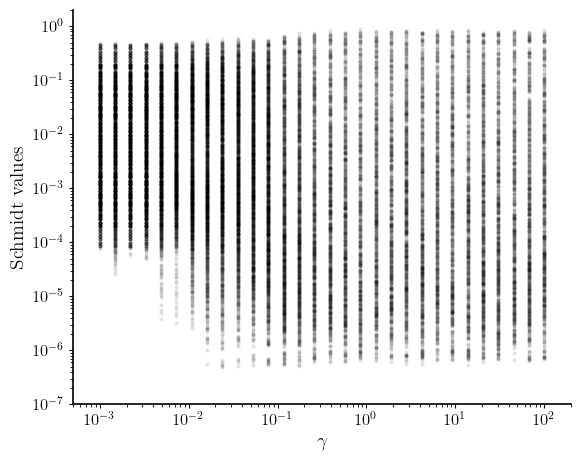

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import pickle

# --- Global plot style (Nature Physics) ---
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "axes.labelsize": 14,
    "font.size": 13,
    "axes.titlesize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "xtick.direction": "out",
    "ytick.direction": "out",
    "axes.linewidth": 1.2,
    "lines.markersize": 4,
    "legend.fontsize": 12,
    "figure.figsize": (6.0, 4.8)
})

# --- Parameters ---
L = 16
gammas = np.logspace(-3, 2, 30)
filename = f"schmidt_{L}.pickle"

# --- Load data ---
with open(filename, 'rb') as f:
    data = pickle.load(f)

# --- Create figure ---
fig, ax = plt.subplots()

for gamma_val, gamma_data in zip(gammas, data):
    for observable in gamma_data:
        if observable.gate.name == "schmidt_spectrum":
            all_values = [np.asarray(traj).ravel() for traj in observable.results]
            schmidt_values = np.concatenate(all_values)
            x_vals = np.full_like(schmidt_values, gamma_val)
            ax.scatter(x_vals, schmidt_values, s=4, alpha=0.08, color='black')

# --- Axes and labels ---
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(5e-4, 2e2)
ax.set_ylim(1e-7, 2)

ax.set_xlabel(r"$\gamma$")
ax.set_ylabel("Schmidt values")

# --- Axes cleanup ---
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(length=3, direction='out')

# --- Save and show ---
plt.tight_layout()
plt.savefig("nature_schmidt_spectrum_vs_gamma.pdf", dpi=300, bbox_inches='tight')
plt.show()

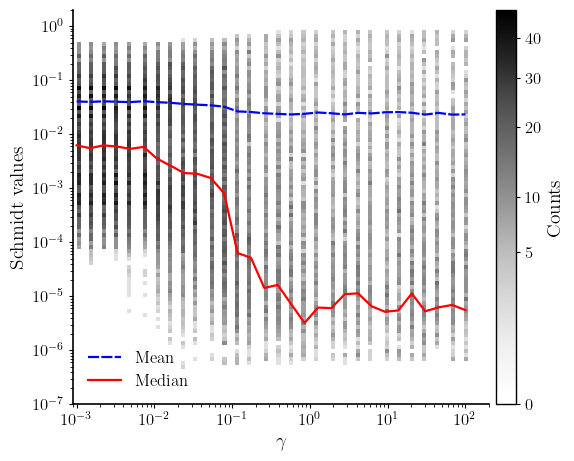

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.ticker as mticker
import pickle

# --- Global plot style (Nature Physics) ---
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "axes.labelsize": 14,
    "font.size": 13,
    "axes.titlesize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "xtick.direction": "out",
    "ytick.direction": "out",
    "axes.linewidth": 1.2,
    "lines.markersize": 4,
    "legend.fontsize": 12,
    "figure.figsize": (6.0, 4.8)
})

# --- Parameters ---
L = 16
gammas = np.logspace(-3, 2, 30)
filename = f"schmidt_{L}.pickle"

# --- Load data ---
with open(filename, 'rb') as f:
    data = pickle.load(f)

# --- Collect all gamma and Schmidt values ---
all_gamma = []
all_schmidt = []
median_schmidt = []
mean_schmidt = []
for gamma_val, gamma_data in zip(gammas, data):
    gamma_schmidts = []
    for observable in gamma_data:
        if observable.gate.name == "schmidt_spectrum":
            all_values = [np.asarray(traj).ravel() for traj in observable.results]
            flat_vals = np.concatenate(all_values)
            gamma_schmidts.extend(flat_vals)
            all_gamma.extend([gamma_val] * len(flat_vals))
            all_schmidt.extend(flat_vals)
    if len(gamma_schmidts) == 0:
        median_schmidt.append(np.nan)
        mean_schmidt.append(np.nan)
    else:
        flat = np.concatenate([np.asarray(arr).ravel() for arr in gamma_schmidts])
        flat = flat[~np.isnan(flat)]
        median_schmidt.append(np.median(flat))
        mean_schmidt.append(np.mean(flat))

all_gamma = np.array(all_gamma)
all_schmidt = np.array(all_schmidt)

# --- Convert to log10 for binning ---
log_gamma = np.log10(all_gamma)
log_schmidt = np.log10(all_schmidt)

# --- Define bin edges ---
x_edges = np.linspace(-3, 2.3, 100)   # log10(gamma)
y_edges = np.linspace(-7, 0.3, 100)   # log10(Schmidt)

# --- 2D Histogram ---
H, x_edges, y_edges = np.histogram2d(log_gamma, log_schmidt, bins=[x_edges, y_edges])

# --- Prepare mesh for plotting (convert back from log bins to linear space) ---
X, Y = np.meshgrid(10**x_edges, 10**y_edges)

# --- Plot heatmap ---
fig, ax = plt.subplots()

pcm = ax.pcolormesh(X, Y, H.T,
                    cmap='Greys',  # or 'Greys' for BW version
                    norm=mcolors.PowerNorm(gamma=0.4, vmin=1, vmax=np.max(H)),
                    shading='auto')

# --- Add median line ---
ax.plot(gammas, mean_schmidt, color='blue', lw=1.6, linestyle=(0, (5, 1)),  label='Mean', zorder=10)
ax.plot(gammas, median_schmidt, color='red', lw=1.6, label='Median', zorder=10)

# --- Axes and labels ---
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(9e-4, 2e2)
ax.set_ylim(1e-7, 2)
ax.set_xlabel(r"$\gamma$")
ax.set_ylabel("Schmidt values")

# --- Style ---
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(length=3, direction='out')

# --- Optional colorbar ---
cbar = fig.colorbar(pcm, ax=ax, pad=0.015)
cbar.set_label("Counts", labelpad=4)
cbar.ax.tick_params(length=3, direction='out')
cbar.outline.set_linewidth(1.0)
# Set cleaner ticks on the colorbar
tick_values = [0, 5, 10, 20, 30, 40]
cbar.set_ticks(tick_values)
cbar.set_ticklabels([str(v) for v in tick_values])

# --- Optional legend ---
ax.legend(loc='lower left', frameon=False)

# --- Save and show ---
plt.tight_layout()
plt.savefig("results.pdf", dpi=300, bbox_inches='tight')
plt.show()
